In [9]:
#Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
# ANOVA(Two way)
#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

                              
#view first ten rows of data 

In [3]:
df.head()

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6


<AxesSubplot:xlabel='sun', ylabel='height'>

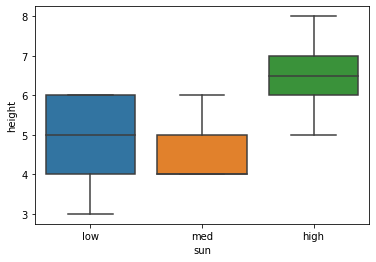

In [4]:
#boxplot
sns.boxplot(x="sun",y="height",data=df)

<AxesSubplot:xlabel='sun', ylabel='height'>

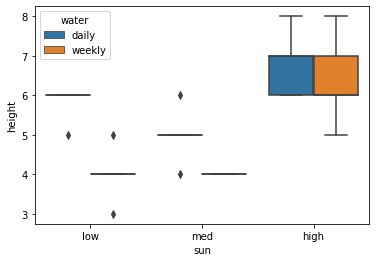

In [5]:
#boxplot
sns.boxplot(x="sun",y="height",data=df, hue="water")

In [6]:
# As we have 2 factor variables one target variable
# so 2-way ANOVA is the right option to choose
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


In [7]:
#Another way of applying 2way anova
import pingouin as pg
anov_table1=pg.anova(data=df, dv="height",between=["sun","water"],detailed=True)
print(anov_table1)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


In [ ]:
#Tukey test kaise lagana hai 2 way annova pr
#Lettering and grouping kese krni hai
#Annotation kaise krni h groups mn

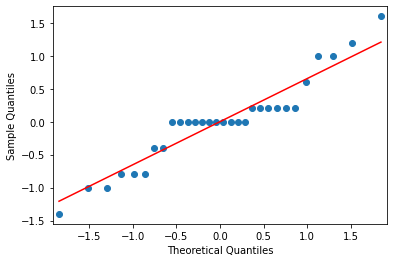

In [10]:
#qq norm plot
res=model.resid
fig=sm.qqplot(res, line="s")
plt.show()

In [14]:
# Tukey test pairwise
pt=pg.pairwise_tukey(data=df, dv="height",between=["sun"])
print(pt)

      A    B  mean(A)  mean(B)  diff        se         T   p-tukey    hedges
0  high  low      6.6      4.9   1.7  0.419877  4.048809  0.001098  1.734175
1  high  med      6.6      4.5   2.1  0.419877  5.001470  0.000088  2.142216
2   low  med      4.9      4.5   0.4  0.419877  0.952661  0.612400  0.408041


# Post-hoc testing
ANOVA will tell you which parameters are significant, but not which levels are actually different from one another. To test this we can use a post-hoc test. The Tukey's Honestly-Significant-Difference (TukeyHSD) test lets us see which groups are different from one another.

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(df["height"], df["sun"])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.7,0.0011,-2.741,-0.659,True
high,med,-2.1,0.0001,-3.141,-1.059,True
low,med,-0.4,0.6124,-1.441,0.641,False


In [24]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# # for main effect Genotype
res.tukey_hsd(df=df, res_var='height', xfac_var=['sun','water'], anova_model='height~C(sun)+C(water)+C(sun):C(water)')
res.tukey_summary

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:369: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(low, daily)","(low, weekly)",1.8,0.371833,3.228167,5.511352,0.007933
1,"(low, daily)","(med, daily)",0.8,-0.628167,2.228167,2.449490,0.522189
2,"(low, daily)","(med, weekly)",1.8,0.371833,3.228167,5.511352,0.007933
3,"(low, daily)","(high, daily)",1.0,-0.428167,2.428167,3.061862,0.289956
4,"(low, daily)","(high, weekly)",0.6,-0.828167,2.028167,1.837117,0.757578
5,"(low, weekly)","(med, daily)",1.0,-0.428167,2.428167,3.061862,0.289956
6,"(low, weekly)","(med, weekly)",0.0,-1.428167,1.428167,0.000000,0.900000
7,"(low, weekly)","(high, daily)",2.8,1.371833,4.228167,8.573214,0.001000
8,"(low, weekly)","(high, weekly)",2.4,0.971833,3.828167,7.348469,0.001000
9,"(med, daily)","(med, weekly)",1.0,-0.428167,2.428167,3.061862,0.289956


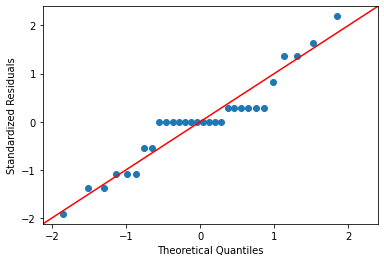

In [25]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

In [38]:
df1 = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

box_pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in box_pairs:
    data1 = df1.groupby(x)[y].get_group(pair[0])
    data2 = df1.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

Performing Bartlett statistical test for equal variances on pair: ('setosa', 'versicolor') stat=6.89e+00 p-value=8.66e-03
Performing Bartlett statistical test for equal variances on pair: ('setosa', 'virginica') stat=1.60e+01 p-value=6.38e-05
Performing Bartlett statistical test for equal variances on pair: ('versicolor', 'virginica') stat=2.09e+00 p-value=1.48e-01
pvalues: [0.008659557933880048, 6.378941946712554e-05, 0.14778816016231236]


In [36]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: Custom statistical test, P_val:8.660e-03
versicolor v.s. virginica: Custom statistical test, P_val:1.478e-01
setosa v.s. virginica: Custom statistical test, P_val:6.379e-05


(<AxesSubplot:xlabel='species', ylabel='sepal_length'>,
  <statannot.StatResult.StatResult at 0x240b9b828c0>])

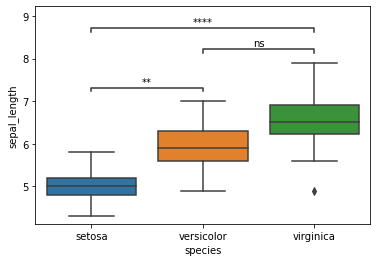

In [40]:
ax = sns.boxplot(data=df1, x=x, y=y)
test_results = add_stat_annotation(ax, data=df1, x=x, y=y,
                                   box_pairs=box_pairs,
                                   perform_stat_test=False, pvalues=pvalues, test_short_name=test_short_name,
                                   text_format='star', verbose=2)
test_results

In [41]:
df2 = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

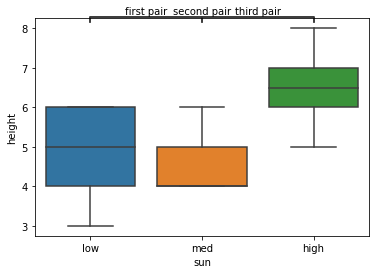

In [49]:
df2 =  pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
x = "sun"
y = "height"
order = ['low', 'med', 'high']
ax = sns.boxplot(data=df2, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df2, x=x, y=y, order=order,
                                   box_pairs=[("low", "med"), ("low", "high"), ("med", "high")],
                                   text_annot_custom=["first pair", "second pair", "third pair"],
                                   perform_stat_test=False, pvalues=[0, 0, 0],
                                   loc='outside', verbose=0)
plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')